CP260-2023:

Lab1: Understanding Image Metrology

You are given an image of a tetrahedron and a cuboid
on a standard A4 sheet of paper (20.8cm x 29.6cm)

You need to extract the length of the two objects
and the angle of the vertices at their faces.

You can assume that all sides of the cuboid and the tetrahedron are of the same length.

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [ ]:
# This package helps to download files from google drive
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#utility functions
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

#function to calculate angle between two lines
def angle(x1,x2):
  x=x1[0]*x2[0]+x1[1]*x2[1]
  y=np.sqrt((x1[0]**2+x1[1]**2)*(x2[0]**2+x2[1]**2))
  return np.arccos(x/y)


#function to convert radian to degree
def rtod(x):
  return (x*180)/(math.pi)

#function to calculate true length
def length(m,n,o,p):

  u=math.dist(m,n)
  v=math.dist(o,p)
  return (29.6*u)/v

In [ ]:
# download the image file from shared link on google drive
import gdown
#url = 'https://drive.google.com/uc?id=1o25MqsrYRyMDOQLOororNncEC3KMziqp'
url='https://drive.google.com/uc?id=1sSRLTmRcU_rlM2yFz2zLyDcATtojeHID'
#url='https://drive.google.com/uc?id=1frpq1lnyIEzSntbyGcjg4-7b4c0c59md'
output = 'Toys.jpg'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sSRLTmRcU_rlM2yFz2zLyDcATtojeHID
To: /content/Toys.jpg
100%|██████████| 264k/264k [00:00<00:00, 64.0MB/s]


'Toys.jpg'

(2992, 2992, 3)


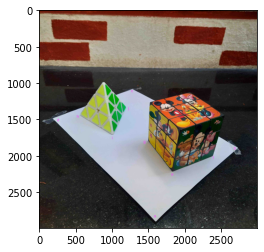

In [ ]:
img = cv.cvtColor(cv.imread('Toys.jpg'), cv.COLOR_BGR2RGB)
plt.imshow(img)
print(img.shape)

You now need to identify the pixel coordinates of the vertices
marked in the image.

You are free to use any tool.

One convenient tool is at
 https://pixspy.com

You can also download the same image from :
https://drive.google.com/drive/folders/1LsoITE13tmyppPN7kwtE8uJCcRIqyu3_

In [ ]:
# Q1 Your answer here
# Find the coordinates of the points a-j and replace 'pass'
# with your answers
a=[1598,2907,1]

###################
#YOUR CODE HERE
b=[2731,1891,1]
c=[1283,1081,1]
d=[194,1492,1]
e=[1829,2214,1]
f=[2386,2001,1]
g=[1501,1785,1]
h=[564,1448,1]
i=[1004,1704,1]
j=[1198,1327,1]

In [ ]:
#Q2: Find the 3x3 matrix H_up which will remove the projective distortion
#Determine the vanishing points and the  vanishing line and construct the
#matrix

lab = np.cross(a, b)

###################
#YOUR CODE HERE
lcd=np.cross(c,d)
lad=np.cross(a,d)
lbc=np.cross(b,c)
p1=np.cross(lab,lcd)
p2=np.cross(lad,lbc)
l=np.cross(p1,p2)
l12=[(l[0]/l[2]),(l[1]/l[2]),1]
###################


print("The vanishing line is:",l12)

# Construct the matrix H_up for undoing projectivity
###################
#YOUR CODE HERE
H_up=np.matrix([[1,0,0],[0,1,0],[l12[0],l12[1],l12[2]]])

###################

#check if it maps vanishing line to line at infinity
print("H_up maps the vanishing line to:",np.linalg.inv(H_up).T @ l12)

The vanishing line is: [-6.697733823660832e-05, 0.0014228676923492272, 1]
H_up maps the vanishing line to: [[0. 0. 1.]]


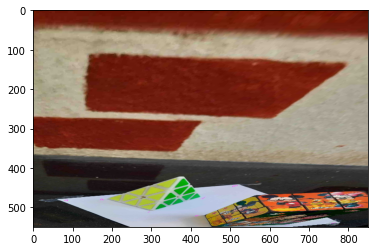

In [ ]:
img_up = cv.warpPerspective(img,H_up,dsize=(850,550))
plt.imshow(img_up)

In [ ]:
#Q3: Now remove the affine distortion by finding two pairs of orthogonal lines
# and calculate the affine matrix
# First find the coordinates of the vertices after applying H_up

a_1 = H_up @ a

###################
#YOUR CODE HERE
b_1 = H_up @ b
c_1 = H_up @ c
d_1 = H_up @ d
e_1 = H_up @ e
g_1 = H_up @ g
f_1 = H_up @ f
h_1 = H_up @ h
i_1 = H_up @ i
j_1 = H_up @ j
a_1= a_1.tolist()
b_1= b_1.tolist()
c_1= c_1.tolist()
d_1= d_1.tolist()
e_1= e_1.tolist()
g_1= g_1.tolist()
f_1= f_1.tolist()
h_1= h_1.tolist()
i_1= i_1.tolist()
j_1= j_1.tolist()

a_1=[(a_1[0][0]/a_1[0][2]),(a_1[0][1]/a_1[0][2]),1]
b_1=[(b_1[0][0]/b_1[0][2]),(b_1[0][1]/b_1[0][2]),1]
c_1=[(c_1[0][0]/c_1[0][2]),(c_1[0][1]/c_1[0][2]),1]
d_1=[(d_1[0][0]/d_1[0][2]),(d_1[0][1]/d_1[0][2]),1]
e_1=[(e_1[0][0]/e_1[0][2]),(e_1[0][1]/e_1[0][2]),1]
g_1=[(g_1[0][0]/g_1[0][2]),(g_1[0][1]/g_1[0][2]),1]
f_1=[(f_1[0][0]/f_1[0][2]),(f_1[0][1]/f_1[0][2]),1]


lab1=np.cross(a_1,b_1)
lad1=np.cross(a_1,d_1)
leg1=np.cross(e_1,g_1)
lef1=np.cross(e_1,f_1)

A=np.array([[(lab1[0]*lad1[0]),(lab1[0]*lad1[1]+lab1[1]*lad1[0])],
            [(leg1[0]*lef1[0]),(leg1[0]*lef1[1]+leg1[1]*lef1[0])]])

B=np.array([[-lad1[1]*lab1[1]],[-lef1[1]*leg1[1]]])
C=np.linalg.solve(A, B )
C=C.tolist()
S=np.matrix([[C[0][0],C[1][0]],[C[1][0],1]])

from numpy.linalg import eig
w,v=eig(S)
D=np.matrix([[w[0],0],[0,w[1]]]) #using eigenvalues to make diagonal matrix
vt=np.transpose(v)
D1=np.sqrt(D)
arr= np.matmul(v,D1)
K=np.matmul(arr,vt)
K=K.tolist()
H_ua=np.linalg.inv(np.matrix([[K[0][0],K[0][1],0],[K[1][0],K[1][1],0],[0,0,1]]))


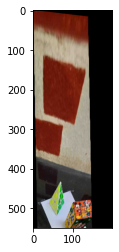

In [ ]:
# Do affine rectification
img_2 = cv.warpPerspective(img_up,H_ua,dsize=(200,550))
plt.imshow(img_2)

In [ ]:
#Q4: Now measure the angles and lenghts
# Since the image is left only with similarity transform
# angles and ratios of lenghts are preserved between the original
# plan of the paper and the image of the paper.

H_ud = H_ua@ H_up

a1 = H_ud @ a
#################
#YOUR CODE HERE


b1 = H_ud @ b
c1 = H_ud @ c
d1 = H_ud @ d
e1 = H_ud @ e
f1 = H_ud @ f
g1 = H_ud @ g
h1 = H_ud @ h
i1 = H_ud @ i
j1 = H_ud @ j


lab2=np.cross(a1,b1)
lad2=np.cross(d1,a1)
lab2=lab.tolist()
lad2=lad.tolist()
lef2=np.cross(f1,e1)
leg2=np.cross(e1,g1)
lef2=lef2.tolist()
leg2=leg2.tolist()
lih2=np.cross(i1,h1)
lij2=np.cross(i1,j1)
a1=a1.tolist()
d1=d1.tolist()
i1=i1.tolist()
h1=h1.tolist()
e1=e1.tolist()
f1=f1.tolist()


lab2=[(lab2[0]/lab2[2]),(lab2[1]/lab[2]),1]
lad2=[(lad2[0]/lad2[2]),(lad2[1]/lad[2]),1]
lih2=[(lih2[0][0]/lih2[0][2]),(lih2[0][1]/lih2[0][2]),1]
lij2=[(lij2[0][0]/lij2[0][2]),(lij2[0][1]/lij2[0][2]),1]
lef2=[(lef2[0][0]/lef2[0][2]),(lef2[0][1]/lef2[0][2]),1]
leg2=[(leg2[0][0]/leg2[0][2]),(leg2[0][1]/leg2[0][2]),1]
a1=[(a1[0][0]/a1[0][2]),(a1[0][1]/a1[0][2]),1]
d1=[(d1[0][0]/d1[0][2]),(d1[0][1]/d1[0][2]),1]
i1=[(i1[0][0]/i1[0][2]),(i1[0][1]/i1[0][2]),1]
h1=[(h1[0][0]/h1[0][2]),(h1[0][1]/h1[0][2]),1]
e1=[(e1[0][0]/e1[0][2]),(e1[0][1]/e1[0][2]),1]
f1=[(f1[0][0]/f1[0][2]),(f1[0][1]/f1[0][2]),1]



################
print("Angle of paper @ vertex a =",round(rtod(angle(lab2,lad2)),1), " degrees")
      #YOUR CODE HERE,
      #angle_between(lab2,lad2), " degrees")

#YOUR CODE HERE

print("Angle  of tetrahedron face @ vertex i =",round(180-rtod(angle(lih2,lij2)))," degrees")
      #YOUR CODE HERE,

print("Length of tetrahedron=",round(length(i1,h1,a1,d1),1),"cm")
      #YOUR CODE HERE,


#YOUR CODE HERE


print("Angle of cube face @ vertex e =",round(rtod(angle(lef2,leg2)),1)," degrees")

print("Length of Cube=",round(length(e1,f1,a1,d1),1),"cm")
      #YOUR CODE HERE,







Angle of paper @ vertex a = 87.1  degrees
Angle  of tetrahedron face @ vertex i = 62  degrees
Length of tetrahedron= 9.5 cm
Angle of cube face @ vertex e = 90.0  degrees
Length of Cube= 8.2 cm


Q5: List the possible sources of errors in the estimation
The angles are 90, 60, 90 for the paper tetrahedron and cuboid
respectively.
The lenghts are 9.9cm and 8.2cm for the tetrahedron and cuboid respectively.

#Write your answer here

**List of Possible Errors:**

1.As there will always be some error in selecting the point in the image,so there always will be some error in result.

2.As we will only consider values upto certain decimal point there will   always   be some error.